# COVID-19 analysis
### Johns Hopkins University data

In [1]:
from read_data import clean_data
import seaborn as sns

In [2]:
sns.set()

In [3]:
# read dayly reports from Johns Hopkins University into one data frame
df = clean_data()

In [4]:
df.head()

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Date
0,Hubei,Mainland China,64287.0,2495.0,16748.0,2020-02-24
1,Guangdong,Mainland China,1345.0,6.0,786.0,2020-02-24
2,Henan,Mainland China,1271.0,19.0,943.0,2020-02-24
3,Zhejiang,Mainland China,1205.0,1.0,782.0,2020-02-24
4,Hunan,Mainland China,1016.0,4.0,731.0,2020-02-24


#### Some exploration 

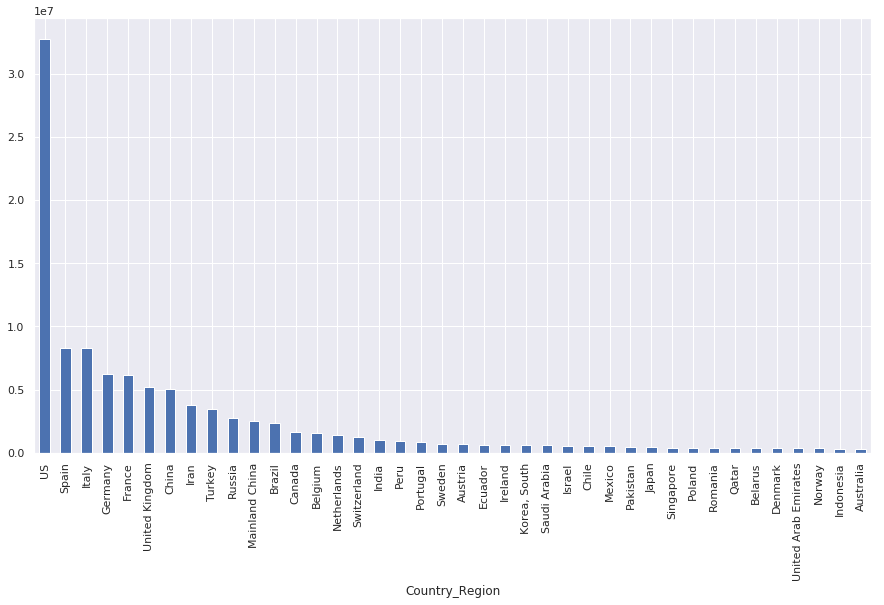

In [5]:
df.groupby('Country_Region').Confirmed.sum().sort_values(ascending=False)[0:40].plot(kind='bar',figsize=(15,8))

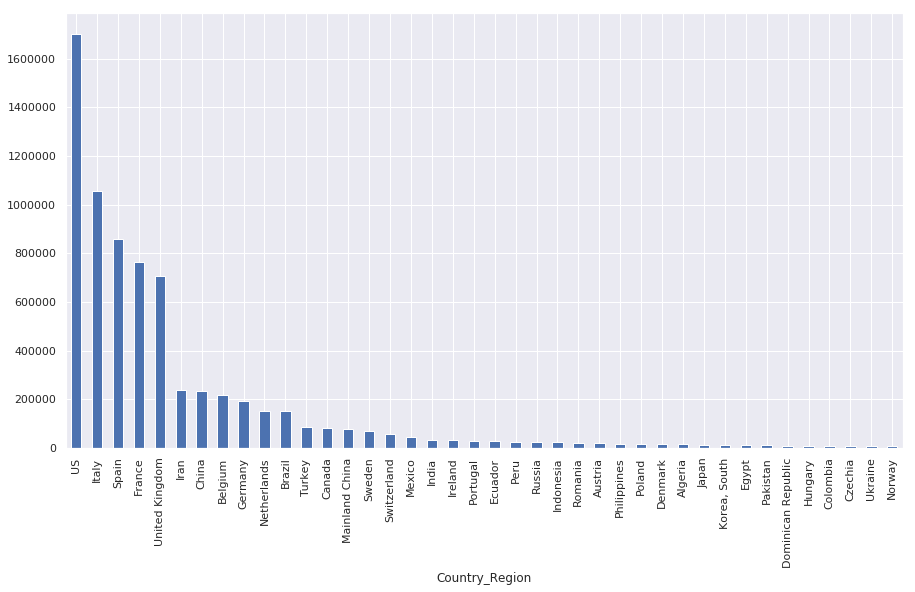

In [6]:
df.groupby('Country_Region').Deaths.sum().sort_values(ascending=False)[0:40].plot(kind='bar',figsize=(15,8))

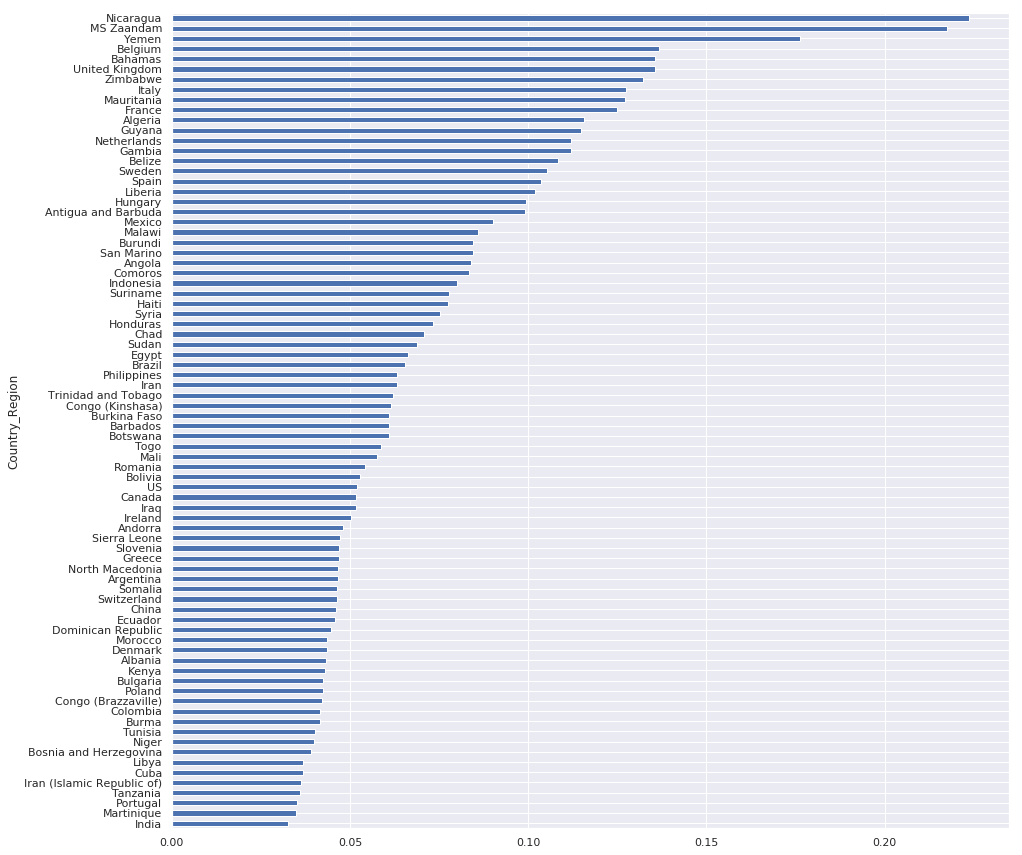

In [7]:
(df.groupby('Country_Region').Deaths.sum()/df.groupby('Country_Region').Confirmed.sum()).sort_values(ascending=False)[0:80].sort_values().plot(kind='barh',figsize=(15,15))

### Data wrangling

In [13]:
# we don't care about Province/state
countries = df.groupby(['Date','Country_Region'], as_index=False).agg({'Confirmed': sum, 'Deaths': sum, 'Recovered': sum})

In [14]:
countries.head()

,Date,Country_Region,Confirmed,Deaths,Recovered
0,2020-01-22,Hong Kong,0.0,0.0,0.0
1,2020-01-22,Japan,2.0,0.0,0.0
2,2020-01-22,Macau,1.0,0.0,0.0
3,2020-01-22,Mainland China,547.0,17.0,28.0
4,2020-01-22,South Korea,1.0,0.0,0.0


In [21]:
# check
# df[df['Country_Region']=='Mainland China'].sort_values('Date').head(31).sum()

Province_State    ChongqingJiangsuInner MongoliaJiangxiJilinLiao...
Country_Region    Mainland ChinaMainland ChinaMainland ChinaMain...
Confirmed                                                       547
Deaths                                                           17
Recovered                                                        28
dtype: object

In [25]:
countries.Country_Region.sort_values().unique()

array([' Azerbaijan', 'Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahamas, The',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'East Timor', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Est

### Cleaning tasks
- unify china and mainland china
- delete space in Azerbaijan
- unify Bahamas ; Bahamas, The and The Bahamas
- unify Diamond princess, MS zaandam and Cruise ship
- unify Gambia and Gambia, The
- unify Hong Kong and Hong Kong SAR
- unify Iran and Iran (Islamic Republic of)
- unify Korea, South ; South Korea and Republic of Korea
- unify Macao SAR and Macau
- unify Moldova and Republic of Moldoca
- unify Congo (Brazzaville) and Republic of the Congo
- unify Russia and Russia Federation
- unify st. martin and saint martin
- unify Taiwan and Taiwan*
- unify Gambia and The Gambia
- unify United Kingdom and UK
- unify Viet Nam and Vietnam
- unify West Bank and Gaza, and occupied Palestinian territory